# **CI Course - EX2**


--------

--------


## Theory Overview ##

**Optimization**:

Optimization definition:

An optimization problem in computational intelligence is a problem that involves finding the best solution from all possible solutions, given certain **constraints** and **objectives**.

Objective function:

An objective function is a mathematical function that we want to optimize or minimize.

$$ max/min(f(X)) $$

Constraints:

constraints in optimization problems are limitations or restrictions that must be taken into account when searching for the optimal solution.</br> Constraints can be expressed as equations, inequalities, or logical statements

for example:

$$ min(f(X)) $$ 

<center> where: <center/> $$ x <=0 $$

**Optimization approaches**:


1. ***GD (gradient descent)*** -  **deterministic method** that iteratively moves in the direction of steepest descent in the objective function to find the minimum. It is well-suited for problems with smooth, continuous functions.

General equation: $$X_{j+1} = X_j - lr*{d \over dx}f(X_j)$$

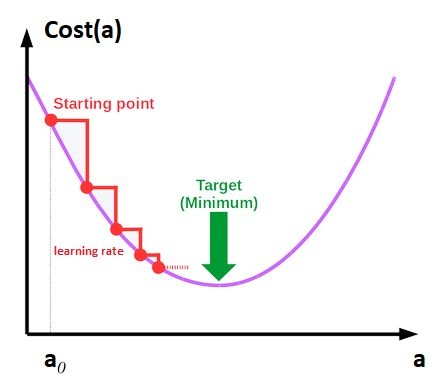

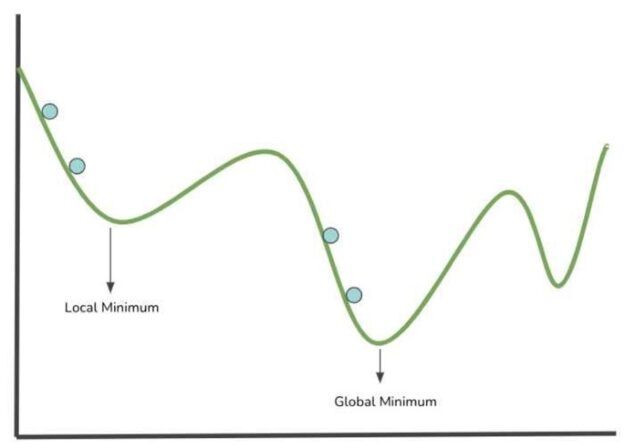

2. ***EC (evolutionary computation)*** - **population-based** optimization technique that uses principles of natural selection and genetics to iteratively search for optimal solutions.

Which method to pick depends on the problem at hand. If the problem is non-linear or has many possible solutions, EC may be a better choice. If the problem is well-behaved and has a clear gradient, GD may be faster and more efficient.

Basic EC cycle:

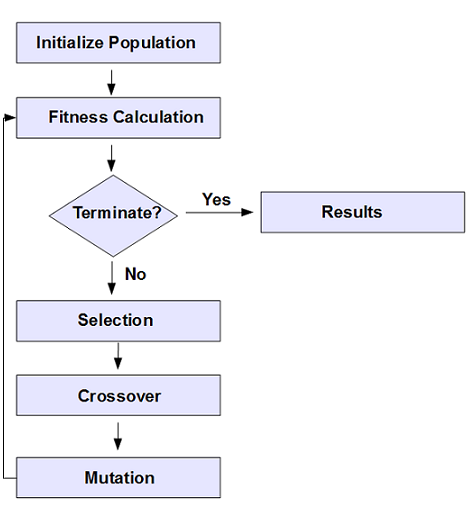
    
Important concept: **exploration vs explotation**:

Exploration:

Refers to the process of searching the solution space for potential solutions that have not yet been encountered or explored. <br/>
Exploration can lead to better and more diverse solutions and can be enhanced by using different selection methods that encourage diversity, such as **tournament selection** and by using **mutation** and **crossover** operators that introduce random variations to the candidate solutions.
    
Explotation:

Refers to the process of focusing on the best solutions that have been found so far and using them to generate even better solutions.<br/>
can be enhanced by using selection methods that emphasize the selection of the best individuals in the population, such as **elitism**.
    
**GA** (basic concepts):

Genetic algorithms (GA) are a specific type of evolutionary computation (EC) that use a specific **encoding** (=representation) of solutions as strings of binary digits or other discrete symbols.

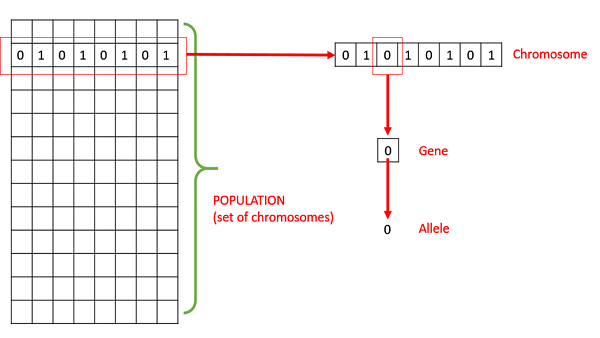





---
    

### Exercise: Traveling Salesman problem (TSP) ###

In computer science, the traveling salesman problem involves finding the shortest possible route that visits a given set of cities and returns to the starting point.<br/> This is an optimization problem where the objective is to minimize the total distance traveled while satisfying the constraint that each city is visited exactly once.

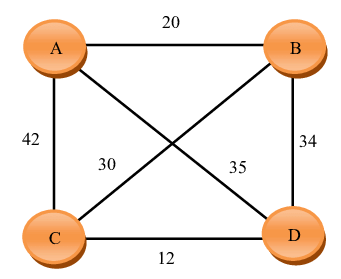

Rephrased the concepts in terms of the TSP:

- Gene: a city (represented as (x, y) coordinates)
- Individual (aka “chromosome”): a single route satisfying the conditions above
- Population: a collection of possible routes (i.e., collection of individuals)
- Parents: two routes that are combined to create a new route
- Mating pool: a collection of parents that are used to create our next population (thus creating the next generation of routes)
- Fitness: a function that tells us how good each route is (in our case, how short the distance is)
- Mutation: a way to introduce variation in our population by randomly swapping two cities in a route
- Elitism: a way to carry the best individuals into the next generation

**GA solution steps:**

1. Create the population

2. Determine fitness

3. Select the mating pool

4. Crossover

5. Mutate

6. Repeat

---


### Solution  ###

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

n_population = 100
mutation_rate = 0.2
alpha = 0.5 # Parameter indicating where to split the parent in the crossover - can also be random

#### 1. Create population #####

In [2]:
def genesis(city_names, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = ''.join(random.sample(city_names, len(city_names)))
        population_set.append(sol_i)
    return np.array(population_set)

# print(f"example: {genesis(['A','B','C'],3)}")

#### 2. Determine Fitness #####

In [10]:
def distance(c1, c2):
    return np.linalg.norm(np.array(c1) - np.array(c2))

# Fitness of a path
def fitness_eval(path, cities_dict):
    n_cities = len(cities_dict)
    total = 0
    for i in range(1, n_cities): #ABC
        total += distance(cities_dict[path[i-1]], cities_dict[path[i]])
    return total

def get_all_fitness(population, cities_dict):
    n_population = len(population)
    fitness_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitness_list[i] = fitness_eval(population[i], cities_dict)

    return fitness_list


# example_cities_dict = {'A': [35, 51],
#                    'B': [113, 213],
#                    'C': [82, 280]}
# example_pop = genesis(example_cities_dict.keys(),len(example_cities_dict))

# print(f"example pop: {example_pop}")
# print(f"example fitness: {get_all_fitness(example_pop,example_cities_dict)}")

#### 3. Mating pool #####

In [4]:
def Mating_selection(population, fitness_list):
    # Compute probability list for selecting parents - small fitness (short distance) provides higher probability! 
    total_fit = fitness_list.sum()
    prob_list = 1 - (fitness_list/total_fit) 
    prob_list = prob_list/prob_list.sum()
    
    # print(prob_list)
    # Notice there is the chance that a parent mates with oneself
    parent_list_a = np.random.choice(list(range(len(population))), len(population),p=prob_list, replace=True)
    parent_list_b = np.random.choice(list(range(len(population))), len(population),p=prob_list, replace=True)
    
    # print(parent_list_a)
    # print(parent_list_b)

    parent_list_a = population[parent_list_a]
    parent_list_b = population[parent_list_b]
    
    return np.array([parent_list_a,parent_list_b])


# example_cities_dict = {'A': [35, 51],
#                    'B': [113, 213],
#                    'C': [82, 280]}
# example_pop = genesis(example_cities_dict.keys(),len(example_cities_dict))
# print(f"example pop: {example_pop}")
# print(f"example fitness: {get_all_fitness(example_pop,example_cities_dict)}")
# example_parents_list = Mating_selection(example_pop,get_all_fitness(example_pop,example_cities_dict))


# print(f"parents list after selection: {example_parents_list}")

#### 4. Crossover #####

We take part (head_a) of parent_a and mate it with another part (tail) in parent_b.<br/> However, some repetitions may occur.<br/> Hence, we replace cities in head_a with cities in tail_a that are not in tail_b.

In [5]:
def mate_parents(parent_a, parent_b):
    
    # alpha = np.random.random() * 0.7 + 0.2 # Can be constant or randomized
    head_a = parent_a[:int(len(parent_a)*alpha)]
    tail_a = parent_a[int(len(parent_a)*alpha):]
    tail_b = parent_b[int(len(parent_b)*alpha):]

    mapping = {tail_b[i]: tail_a[i] for i in range(len(tail_a))}
    
    # print(mapping)
    
    for i in range(len(head_a)):
        while head_a[i] in tail_b:
            # print(head_a, mapping[head_a[i]])
            
            head_a = head_a.replace(head_a[i], mapping[head_a[i]] )
    # print(head_a + tail_b)
    return head_a + tail_b

def mate_parents_list(Mating_list):
    new_population = []
    for i in range(Mating_list.shape[1]):
        parent_a, parent_b = Mating_list[0][i], Mating_list[1][i]
        # print("parents:")
        # print(parent_a, parent_b)
        offspring = mate_parents(parent_a, parent_b)
        new_population.append(offspring)
        
    return new_population

# example_cities_dict = {'A': [35, 51],
#                    'B': [113, 213],
#                    'C': [82, 280]}
# example_pop = genesis(example_cities_dict.keys(),len(example_cities_dict))
# example_parents_list = Mating_selection(example_pop,get_all_fitness(example_pop,example_cities_dict))
# example_cross = mate_parents_list(example_parents_list)

# # print(f"example pop: {example_pop}")
# # print(f"example fitness: {get_all_fitness(example_pop,example_cities_dict)}")
# # print(f"parents list after selection: {example_parents_list}")
# # print(f"example after crossover {example_cross}")

#### 5. Mutate #####

For each element of the new population, we add a random chance of swapping

In [6]:
def mutate_offspring(offspring, n_cities):
    offspring = list(offspring)
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0, n_cities)
        b = np.random.randint(0, n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return ''.join(offspring)
    
    
def mutate_population(new_population, n_cities):
    mutated_pop = []
    for offspring in new_population:
        mutated_pop.append(mutate_offspring(offspring, n_cities))
    return np.array(mutated_pop)

# example_cities_dict = {'A': [35, 51],
#                    'B': [113, 213],
#                    'C': [82, 280]}
# example_pop = genesis(example_cities_dict.keys(),len(example_cities_dict))
# example_parents_list = Mating_selection(example_pop,get_all_fitness(example_pop,example_cities_dict))
# example_cross = mate_parents_list(example_parents_list)
# example_mutate = mutate_population(example_cross,len(example_cross))

# print(f"example pop: {example_pop}")
# print(f"example fitness: {get_all_fitness(example_pop,example_cities_dict)}")
# print(f"parents list after selection: {example_parents_list}")
# print(f"example after crossover: {example_cross}")
# print(f"example mutate: {example_mutate}")

#### 6. Solve #####

In [7]:
def solve(cities_list):

    n_cities = len(cities_list)
    population = genesis(list(cities_list.keys()), n_population)

    best_solution = [-1, np.inf, []]
    BEST = []
    
    for i in range(1, 5000):
        if i % 100 == 0: 
            print(f"iteration: {i} | fit: {fitness_list.min()} | fit avg: {fitness_list.mean()} | best sol: {best_solution[1]}")

            # fig = plt.figure(0)
            # fig.clf()
            # plt.plot(BEST, 'k')
            # plot_path(cities_list, best_solution[2], best_solution[1])
            # plt.pause(0.0001)

        fitness_list = get_all_fitness(population, cities_list)
        
        #Saving the best solution
        if fitness_list.min() < best_solution[1]:
            best_solution[0] = i
            best_solution[1] = fitness_list.min()
            best_solution[2] = population[fitness_list.min() == fitness_list][0]

        Mating_list = Mating_selection(population, fitness_list)
        new_population = mate_parents_list(Mating_list)
        
        population = mutate_population(new_population, n_cities)
        
        BEST.append(best_solution[1])

        if i > 3000 and np.all(np.array(BEST[:-2000]) == BEST[-1]):
            break

    return best_solution

#### Plot ####

In [8]:
def plot_path(cities_list, path, fitness):

    fig = plt.figure(1, figsize=(6, 4))
    fig.clf()

    loc = np.array(list(cities_list.values()))
    plt.scatter(x=loc[:, 0], y=loc[:, 1], s=500, zorder=1)

    for city in cities_list.keys():
        plt.text(cities_list[city][0], cities_list[city][1], city, horizontalalignment='center', verticalalignment='center', size=10, c='white')

    for i in range(len(path)-1):
        plt.plot([cities_list[path[i]][0], cities_list[path[(i + 1)]][0]],
                 [cities_list[path[i]][1], cities_list[path[(i + 1)]][1]], 'k', zorder=0)
    plt.title(f'Visiting {len(path)} cities in distance {fitness:.2f}', size=16)
    # plt.show()

#### Run TSP example ####

iteration: 100 | fit: 3450.4041585049445 | fit avg: 4270.037492596134 | best sol: 2626.3759834392904
iteration: 200 | fit: 3435.183718801597 | fit avg: 4334.953073790592 | best sol: 2626.3759834392904
iteration: 300 | fit: 3134.7665267557168 | fit avg: 4318.229277859378 | best sol: 2626.3759834392904
iteration: 400 | fit: 3498.750730242896 | fit avg: 4207.507490996802 | best sol: 2626.3759834392904
iteration: 500 | fit: 3486.0514730114987 | fit avg: 4274.268600022053 | best sol: 2626.3759834392904
iteration: 600 | fit: 3484.9616260312564 | fit avg: 4291.209231356827 | best sol: 2626.3759834392904
iteration: 700 | fit: 3403.4353481310627 | fit avg: 4298.31194267709 | best sol: 2626.3759834392904
iteration: 800 | fit: 3246.5345083277944 | fit avg: 4259.514969627984 | best sol: 2626.3759834392904
iteration: 900 | fit: 3421.338214300086 | fit avg: 4273.222690884757 | best sol: 2165.2313554546163
iteration: 1000 | fit: 3265.0647822952296 | fit avg: 4315.431755176871 | best sol: 2165.2313554

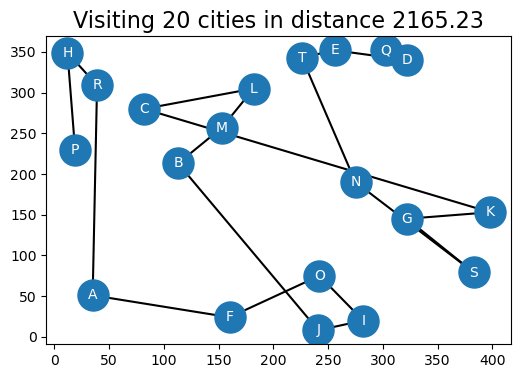

In [9]:
cities_list = {'A': [35, 51],
                   'B': [113, 213],
                   'C': [82, 280],
                   'D': [322, 340],
                   'E': [256, 352],
                   'F': [160, 24],
                   'G': [322, 145],
                   'H': [12, 349],
                   'I': [282, 20],
                   'J': [241, 8],
                   'K': [398, 153],
                   'L': [182, 305],
                   'M': [153, 257],
                   'N': [275, 190],
                   'O': [242, 75],
                   'P': [19, 229],
                   'Q': [303, 352],
                   'R': [39, 309],
                   'S': [383, 79],
                   'T': [226, 343]}

sol = solve(cities_list)

print("Best solution:", sol)
plot_path(cities_list, sol[2], sol[1])
plt.show()


___



## Summary ##

In this class we cover:

1. Optimization basics - definitions, objective function and constrains and optimization approaches.
2. EC and GA cycle and basic concepts
3. Present the TSP problem and solve it using GA! 

well done!

---

## Helpful and extra links ##

1. [Introduction to Genetic Algorithms](https://www.youtube.com/watch?v=vg1FTkWHNSg&list=PLL61h44ln0J0Pbs2EPR71wn-8wvwxHI9z)

2. [Evolution of a salesman: A complete genetic algorithm tutorial for Python](https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35)

3. [An extensible Evolutionary Algorithm Example in Python](https://towardsdatascience.com/an-extensible-evolutionary-algorithm-example-in-python-7372c56a557b)





---